## Aplicación de la Puerta Pauli-Y sobre el estado |+i⟩
Estado inicial
El qubit se inicializa en el estado superposición:
$$|+i\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{i}{\sqrt{2}} |1\rangle$$

=== APLICACIÓN DE LA PUERTA PAULI-Y SOBRE EL ESTADO |+i⟩ ===

Estado inicial del qubit: |+i⟩ = (1/√2)|0⟩ + (i/√2)|1⟩
Amplitudes iniciales: [0.5 + 0.5j, 0.5 - 0.5j]

Circuito cuántico:


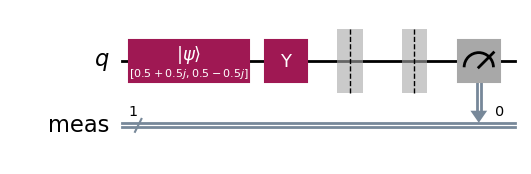


=== RESULTADO TEÓRICO ===
Statevector final: [-0.5-0.5j -0.5+0.5j]
Estado resultante: |ψ⟩ = (-0.500-0.500j)|0⟩ + (-0.500+0.500j)|1⟩
Transformación: Y |+i⟩ = -i |+i⟩ → fase global -i (equivalente a |+i⟩ hasta fase)

Probabilidades teóricas:
P(|0⟩) = 0.500 → 50.0%
P(|1⟩) = 0.500 → 50.0%

=== RESULTADO EXPERIMENTAL ===

Resultados de simulación (1024 shots):
|0⟩:  512 veces (50.0%) ─ Teórico: 50.0%
|1⟩:  512 veces (50.0%) ─ Teórico: 50.0%

Distribución de resultados:


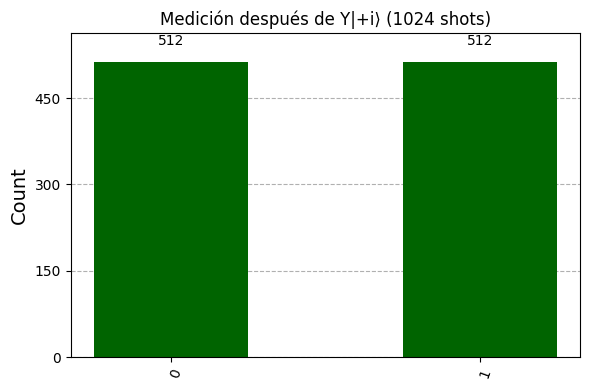

In [1]:
# Importar librerías necesarias
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

print("=== APLICACIÓN DE LA PUERTA PAULI-Y SOBRE EL ESTADO |+i⟩ ===\n")

print("Estado inicial del qubit: |+i⟩ = (1/√2)|0⟩ + (i/√2)|1⟩")
print("Amplitudes iniciales: [0.5 + 0.5j, 0.5 - 0.5j]\n")

# Circuito teórico (sin medición)
qc = QuantumCircuit(1)
qc.initialize([0.5 + 0.5j, 0.5 - 0.5j], 0)  # Inicializar en |+i⟩
qc.y(0)  # Aplicar puerta Pauli-Y

# Circuito para simulación (con medición)
qc_sim = qc.copy()
qc_sim.barrier()
qc_sim.measure_all()

# Mostrar circuito gráfico
print("Circuito cuántico:")
display(qc_sim.draw(output='mpl'))
print()

# ========================
# RESULTADO TEÓRICO
# ========================
print("=== RESULTADO TEÓRICO ===")
sv = Statevector.from_instruction(qc)
print(f"Statevector final: {sv.data}")

# Formato bonito con signo + explícito en parte imaginaria
a0 = sv.data[0]
a1 = sv.data[1]
print(f"Estado resultante: |ψ⟩ = ({a0.real:.3f}{a0.imag:+.3f}j)|0⟩ + ({a1.real:.3f}{a1.imag:+.3f}j)|1⟩")
print("Transformación: Y |+i⟩ = -i |+i⟩ → fase global -i (equivalente a |+i⟩ hasta fase)\n")

probs = sv.probabilities_dict()
print("Probabilidades teóricas:")
for state in ['0', '1']:
    p = probs.get(state, 0.0)
    print(f"P(|{state}⟩) = {p:.3f} → {p:.1%}")

# ========================
# RESULTADO EXPERIMENTAL
# ========================
print("\n=== RESULTADO EXPERIMENTAL ===")
shots = 1024
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"\nResultados de simulación ({shots} shots):")
for state in ['0', '1']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs.get(state, 0.0)
    print(f"|{state}⟩: {count:4d} veces ({prob_exp:.1%}) ─ Teórico: {prob_teo:.1%}")

# Histograma
print("\nDistribución de resultados:")
display(plot_histogram(counts, 
                      title=f"Medición después de Y|+i⟩ ({shots} shots)",
                      color='darkgreen',
                      figsize=(6, 4)))